In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Exploratory Data Analysis

In [2]:
df=pd.read_excel("Cleaned_Employee_Data.xlsx",engine='openpyxl')
display(df)
print(df.shape)
print(df.columns)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [3]:
df.info() # Summary of df - no of non-null entries per column, col names and data types, memory usage
df.isnull().sum() # Detects missing values and counts them per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.describe() # Generates statistics (count, mean, std..etc)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df['Attrition'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%' # Percentage of people left the company and stayed

Attrition
No     83.88%
Yes    16.12%
Name: proportion, dtype: object

In [6]:
# The column name and frequency count of each unique value
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}:\n{df[col].value_counts()}\n")

Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married   

C:\Users\HP\AppData\Local\Temp\ipykernel_28384\597273945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Blues')


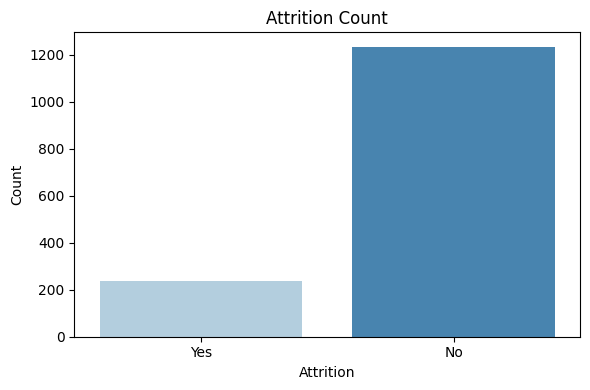

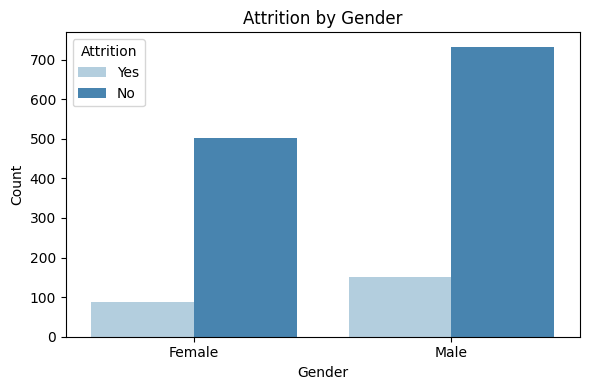

In [7]:
# Bar charts showing the count of each category in the Attrition column
# palette = sns.color_palette("muted")
# First plot: Attrition count
plt.figure(figsize=(6, 4)) 
sns.countplot(data=df, x='Attrition', palette='Blues')
plt.title('Attrition Count') 
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Second plot: Gender vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Blues')
plt.title('Attrition by Gender') 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

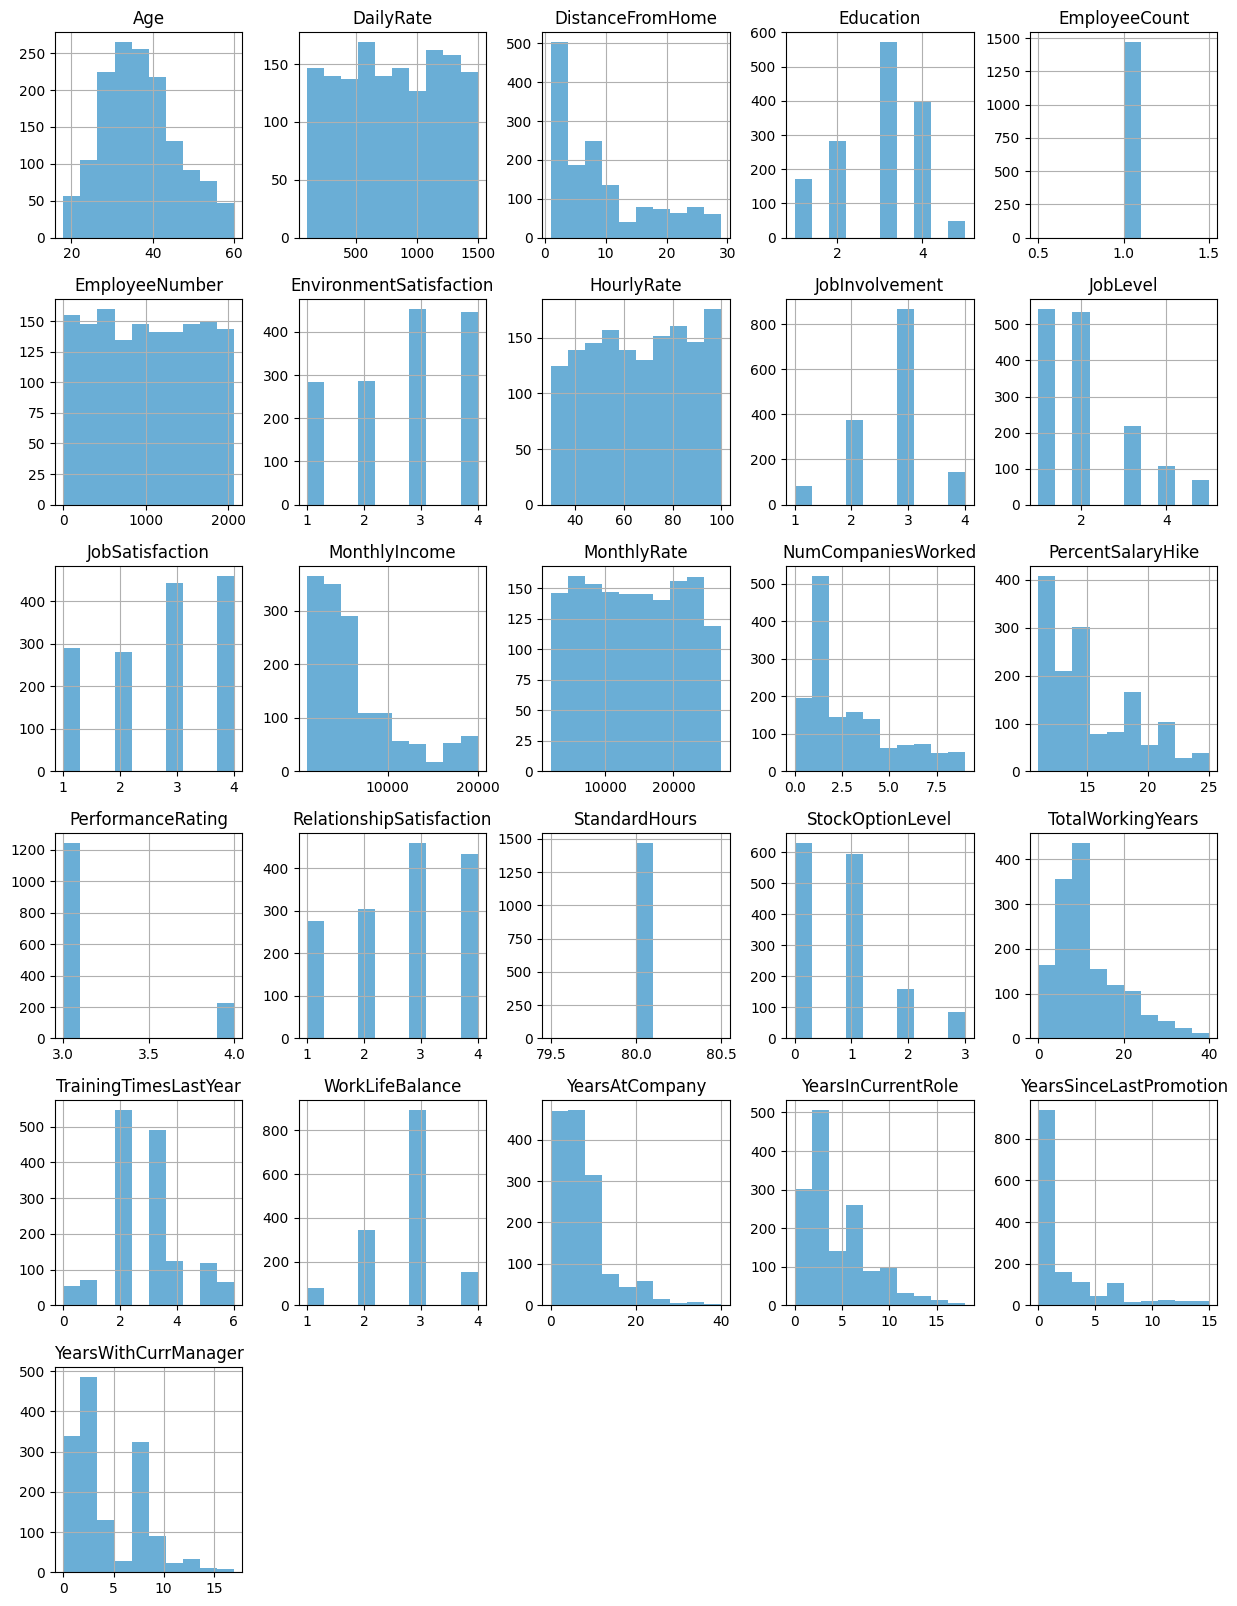

In [8]:
# Histogram for understanding distribution
df.hist(figsize=(15, 20), color=sns.color_palette('Blues', n_colors=1)[0])

<Axes: xlabel='Attrition', ylabel='Age'>

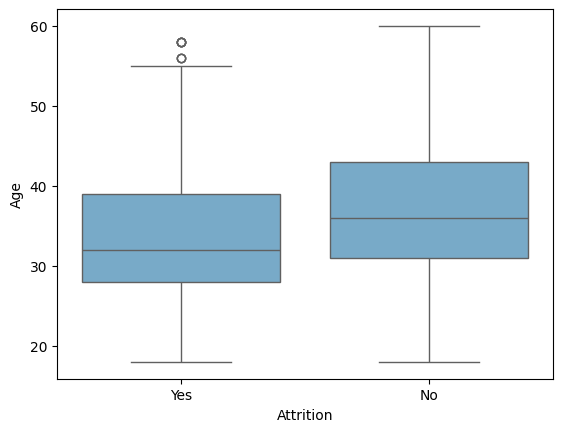

In [9]:
# Box plot to check relationship people leaving/not leaving the company and their age range
sns.boxplot(x='Attrition', y='Age', data=df, color=sns.color_palette('Blues', n_colors=1)[0])

<Axes: >

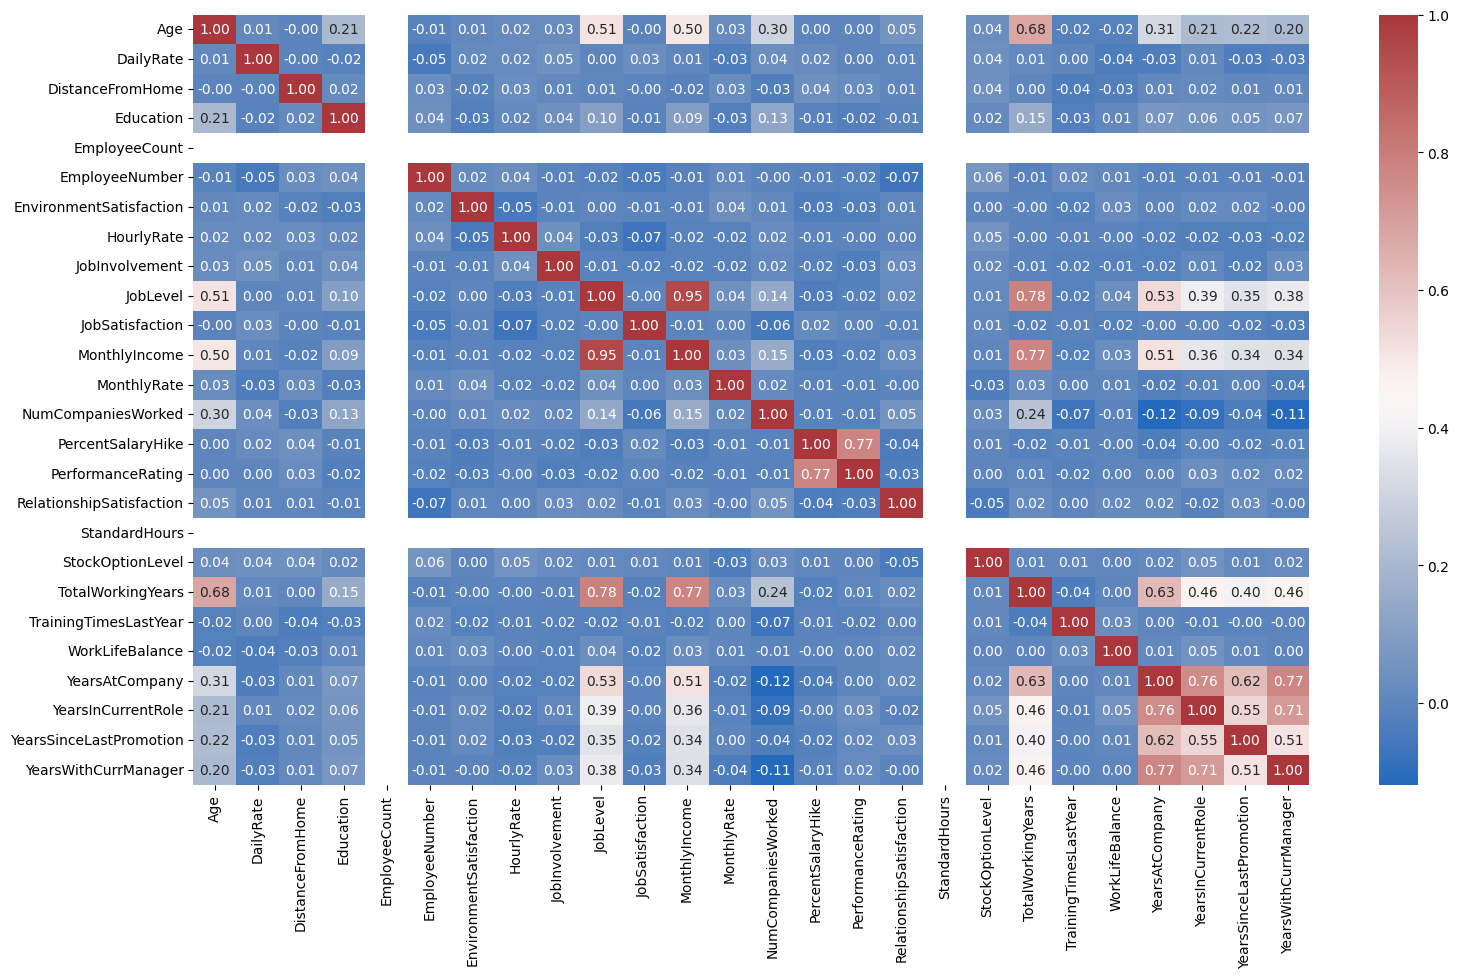

In [10]:
# Heatmap of the correlation matrix between numerical columns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag')

Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64


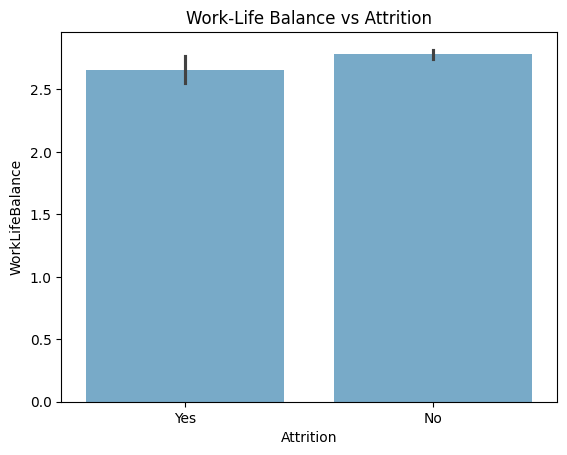

Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64


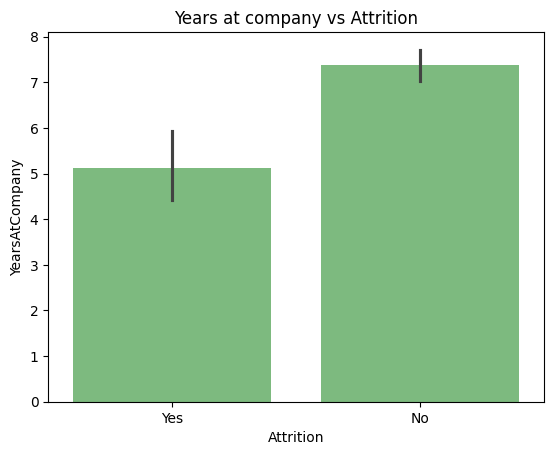

Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64


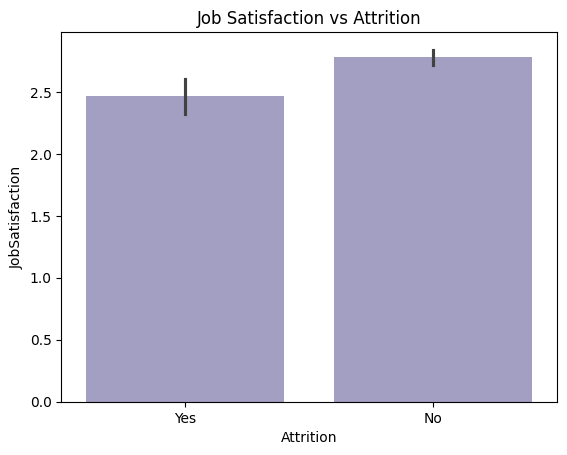

In [11]:
# Grouping the data by 'Attrition' and calculating the mean for different columns - Display using Barplots
mean_work_life_balance = df.groupby('Attrition')['WorkLifeBalance'].mean()
print(mean_work_life_balance)
sns.barplot(x='Attrition', y='WorkLifeBalance', data=df, color=sns.color_palette('Blues', n_colors=1)[0])
plt.title('Work-Life Balance vs Attrition')
plt.show()

mean_years_at_company = df.groupby('Attrition')['YearsAtCompany'].mean()
print(mean_years_at_company)
sns.barplot(x='Attrition', y='YearsAtCompany', data=df, color=sns.color_palette('Greens', n_colors=1)[0])
plt.title('Years at company vs Attrition')
plt.show()

mean_job_satisfaction = df.groupby('Attrition')['JobSatisfaction'].mean()
print(mean_job_satisfaction)
sns.barplot(x='Attrition', y='JobSatisfaction', data=df, color=sns.color_palette('Purples', n_colors=1)[0])
plt.title('Job Satisfaction vs Attrition')
plt.show()

# Training ML Algorithms

## Data Pre Processing

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
unique_values = df['BusinessTravel'].unique()
unique_values

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [14]:
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})
df.BusinessTravel = df.BusinessTravel.map({'Travel_Frequently':1, 'Travel_Rarely':2, 'Non-Travel':0})
df.Department = df.Department.map({'Research & Development':2, 'Sales':1, 'Human Resources':0})
df.EducationField=df.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0})
df.Gender=pd.get_dummies(df.Gender,drop_first=True)
df.JobRole=df.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,
                          'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,'Manager':1,'Research Director':0})
df.MaritalStatus = df.MaritalStatus.map({'Single':2,'Married':1,'Divorced':0})
df.OverTime = df.OverTime.map({'Yes':1,'No':0})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   bool  
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
# Dropping unique values
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

In [17]:
x=df.drop('Attrition',axis=1) # Split all column's except Attrition (Target Input)
y=df['Attrition'] # Predict this

In [18]:
# Balancing the target columns using smote
from collections import Counter
from imblearn.over_sampling import SMOTE
sm= SMOTE()
print("unblanced data: ",Counter(y))
x_sm,y_sm= sm.fit_resample(x,y)
print("blanced data: ",Counter(y_sm))

unblanced data:  Counter({0: 1233, 1: 237})
blanced data:  Counter({1: 1233, 0: 1233})


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm, random_state=42,test_size=0.25)

### Decision Tree Classifier Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
# Prediction
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [22]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       311
           1       0.79      0.84      0.81       306

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617



In [23]:
# Checking if data is fully trained or not
train_pred=dt.predict(x_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



### Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(n_estimators=100)

In [26]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_prediction=rfc.predict(x_test)
print(classification_report(y_test,y_prediction))
print("ROC AUC Score:", roc_auc_score(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       311
           1       0.93      0.90      0.91       306

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

ROC AUC Score: 0.913976630309144


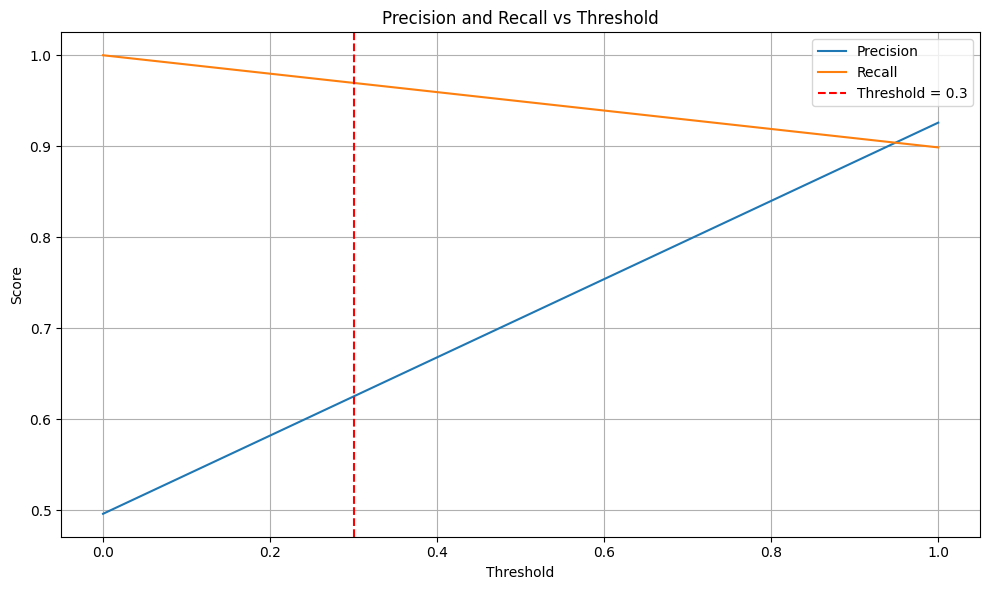

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prediction)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.axvline(x=0.3, color='red', linestyle='--', label="Threshold = 0.3")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


best_rf.predict_proba(X_test)[:, 1]
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()


# Step 1: Get probability scores for class 1 (Attrition = Yes)
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Step 2: Set a lower threshold (try 0.3 instead of default 0.5)
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

# Step 3: Re-evaluate
print("Adjusted Threshold Results (Threshold = 0.5):")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh))

print("ROC AUC Score:", roc_auc_score(y_test, y_probs))
# Have to check by tuning hyper parameters
